# <span style="color:blue"> MBA em Ciência de Dados</span>
# <span style="color:blue">Técnicas Avançadas para Captura e Tratamento de Dados</span>

## <span style="color:blue">Identificação e Extração de Texto</span>
    
## <span style="color:blue">Avaliação</span>

**Material Produzido por Luis Gustavo Nonato**<br>
**Cemeai - ICMC/USP São Carlos**
---

Os exercícios a seguir farão uso do aquivo <font style="font-family: monaco"> nfe-avaliacao.pdf</font>, disponíveis para download no Moodle.

# Rondando o notebook em ambiente dedicado: ocr_env

In [1]:
%env TESSDATA_PREFIX= C:\Users\joaop\Documents\Data Science\USP MBA CD\Disciplina 3 - Técnicas Avançadas de Captura e Tratamento de Dados\A5 Identificação e Extração de Texto\tessdata 

env: TESSDATA_PREFIX=C:\Users\joaop\Documents\Data Science\USP MBA CD\Disciplina 3 - Técnicas Avançadas de Captura e Tratamento de Dados\A5 Identificação e Extração de Texto\tessdata


In [2]:
# verificando o ambiente que o conda está rodando
!conda info


     active environment : ocr_env
    active env location : C:\Users\joaop\anaconda3\envs\ocr_env
            shell level : 1
       user config file : C:\Users\joaop\.condarc
 populated config files : C:\Users\joaop\.condarc
          conda version : 4.10.1
    conda-build version : 3.21.4
         python version : 3.8.10.final.0
       virtual packages : __cuda=11.2=0
                          __win=0=0
                          __archspec=1=x86_64
       base environment : C:\Users\joaop\anaconda3  (writable)
      conda av data dir : C:\Users\joaop\anaconda3\etc\conda
  conda av metadata url : https://repo.anaconda.com/pkgs/main
           channel URLs : https://repo.anaconda.com/pkgs/main/win-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/win-64
                          https://repo.anaconda.com/pkgs/r/noarch
                          https://repo.anaconda.com/pkgs/msys2/win-64
                  

### Exercício 1)
Considere a nota fiscal eletrônica representada no arquivo <font style="font-family: monaco"> nfe-avaliacao.pdf</font>. Converta o arquivo PDF em uma imagem no formato PNG. Utilize o pacote <font color='blue'>PIL</font> para carregar a imagem gerada. Qual a resolução da imagem gerada?

<font color='red'>a) 1653 X 2339</font> <br>
b) 1024 X 640 <br>
c) 640 X 2339<br>
d) 1001 X 2020


**Dica**: Utilize o atribute `size` do objeto PIL para obter as dimensões da imagem e empregue os parâmetros default do método <font color='blue'>convert_from_path</font> para gerar a imagem.


In [3]:
from pdf2image import convert_from_path 
from PIL import Image, ImageFilter, ImageEnhance

(1653, 2339)
<class 'tuple'>
width:  1653
height: 2339
width:  1653
height: 2339


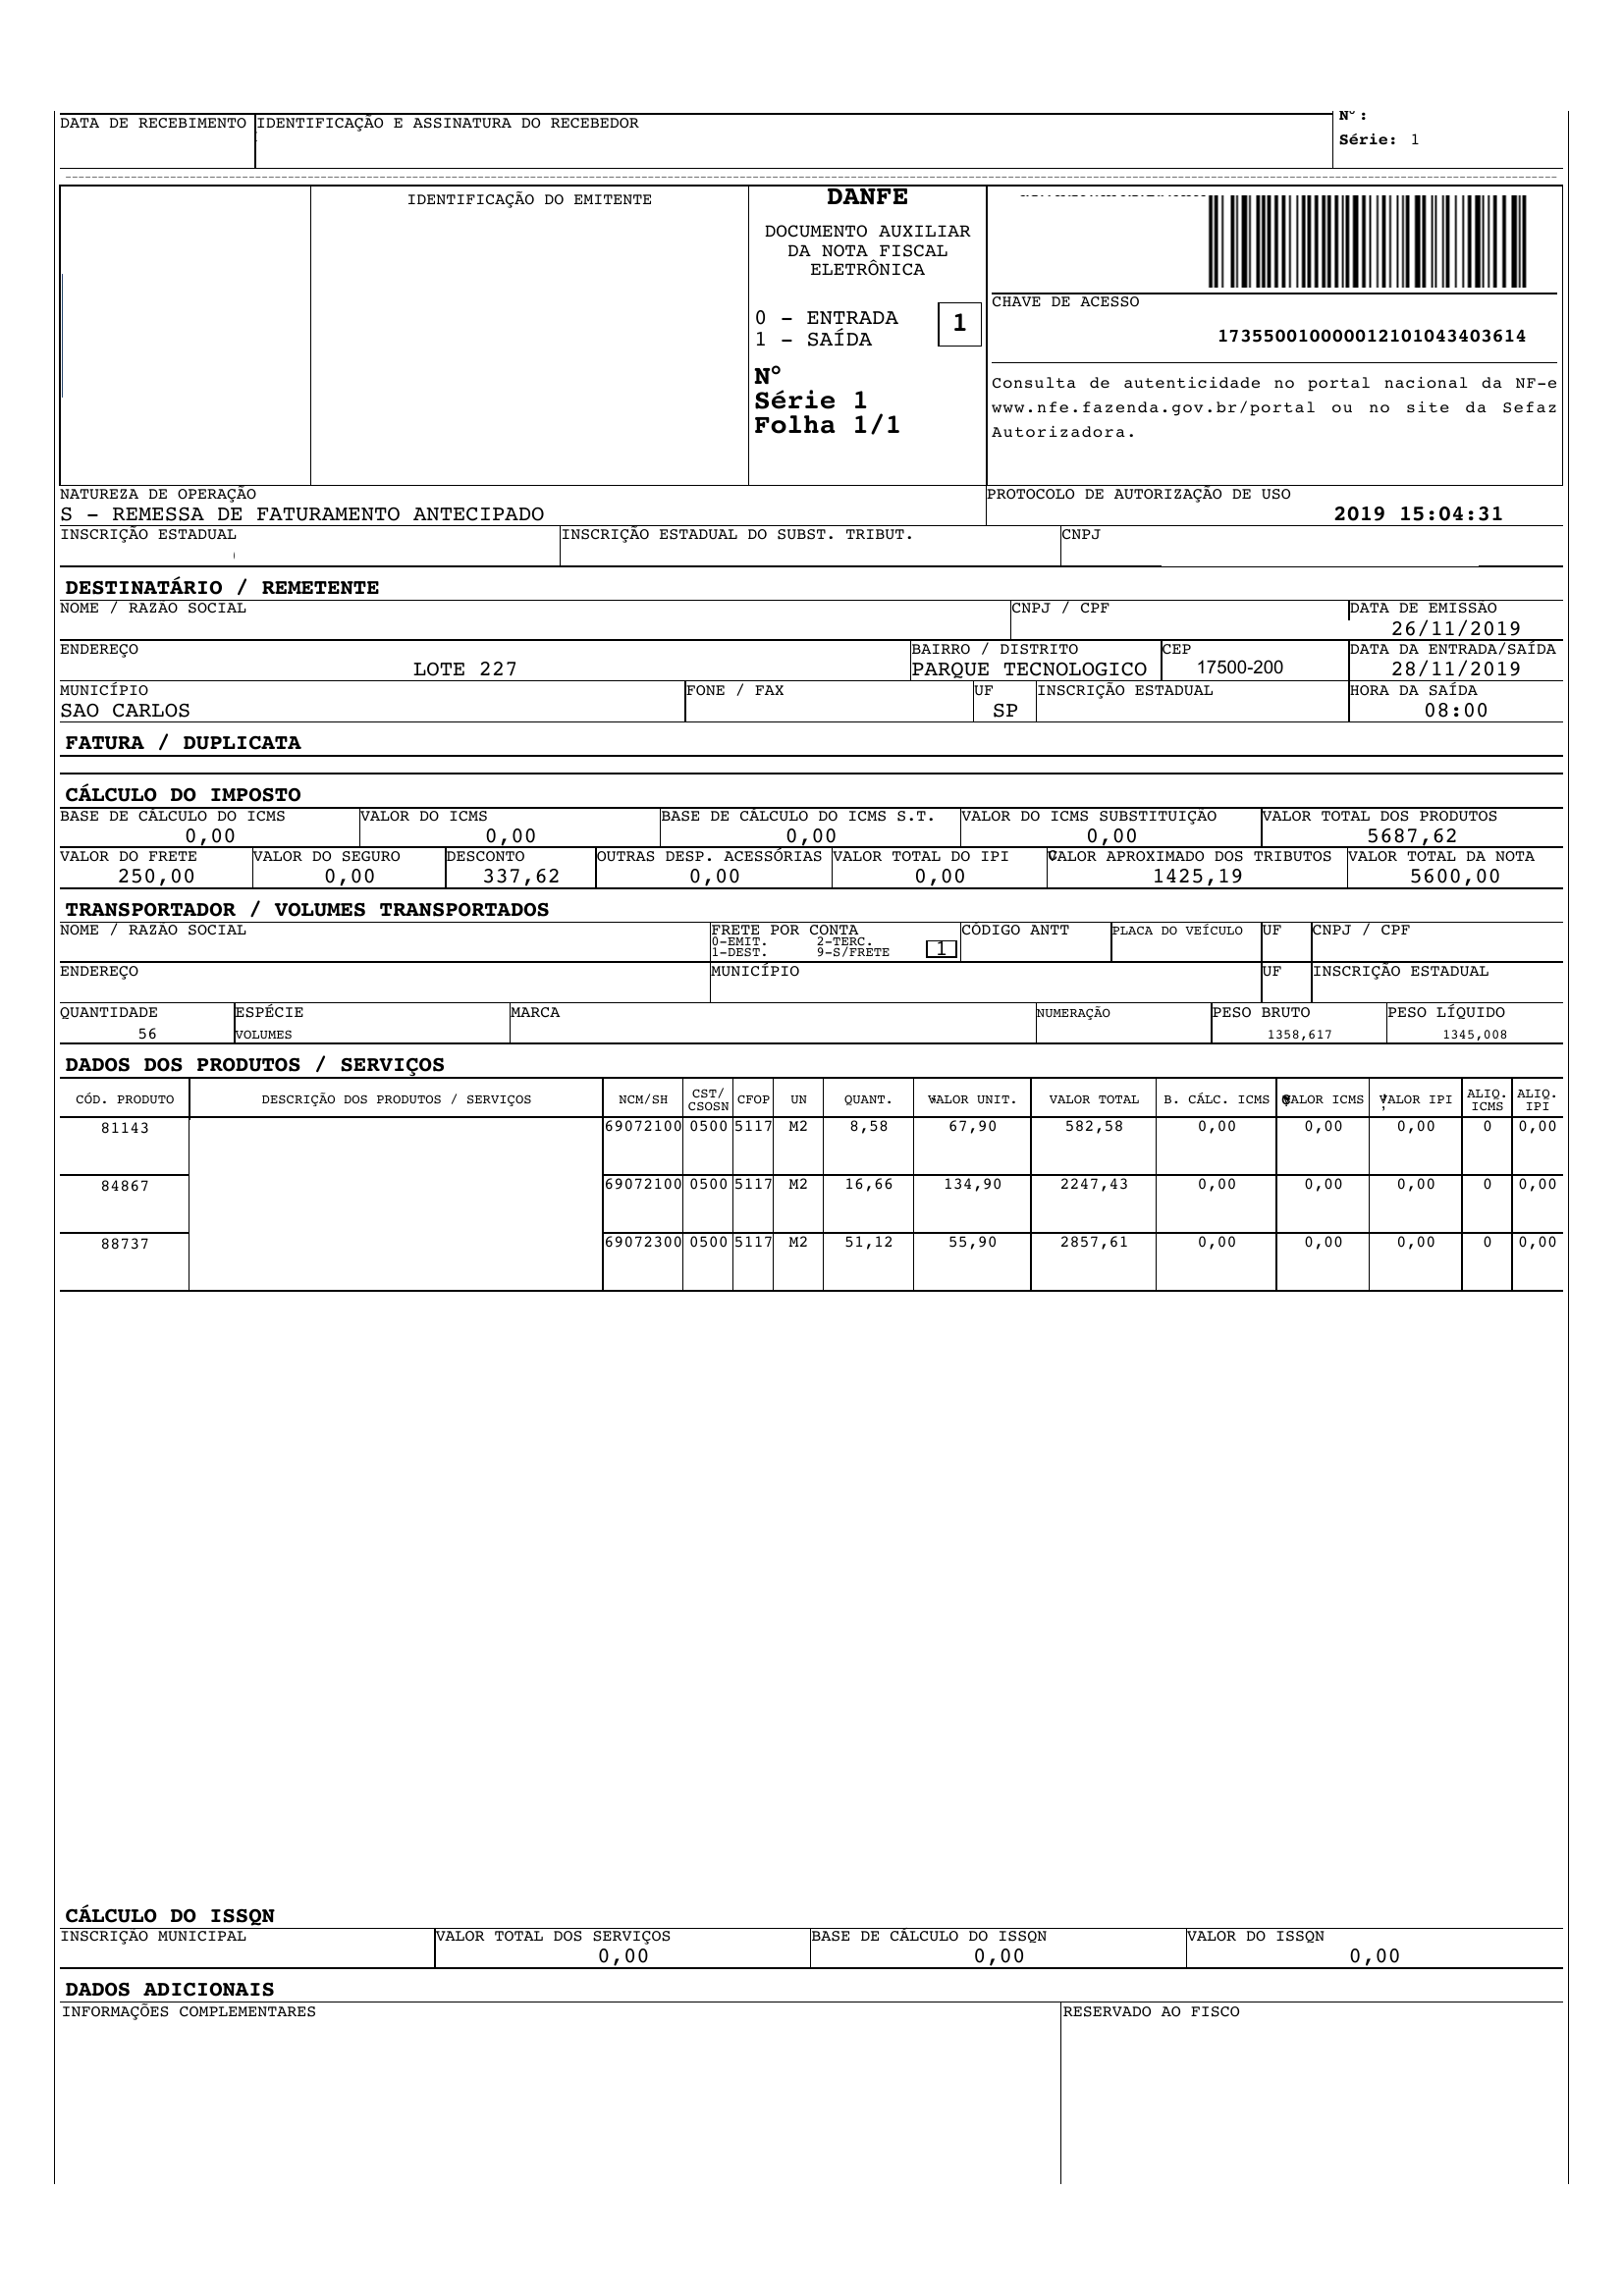

In [4]:
# Carrega o PDF e armazena todas as páginas separadamente na variável
imagem_nfe = convert_from_path('nfe-avaliacao.pdf')

# Salva as páginas como arquivos de imagem
for i,pagina in enumerate(imagem_nfe): 
    pagina.save('nfe-avaliacao.png', 'PNG')
        
im =  Image.open('nfe-avaliacao.png')
# im = im.convert("L")                    # converte de RGB para L
# im = im.filter(ImageFilter.DETAIL)      # melhoria de imagem
im = im.point(lambda i: i * 1.2)          # multiplica cada pixel por ?
# enh = ImageEnhance.Contrast(im)         # melhoria de imagem
# im = enh.enhance(1.9)                   # 90% more contrast
# bri = ImageEnhance.Brightness(im)       # factor 0.0 gives a black image; 1.0 gives the original image
# im = bri.enhance(0.5)


print(im.size)
print(type(im.size))

w, h = im.size
print('width: ', w)
print('height:', h)

print('width: ', im.width)
print('height:', im.height)

Image.open('nfe-avaliacao.png')

### Exercício 2)
Aplique OCR para extrair o texto contido na imagem gerada no exercício 1). Quantas linhas o texto resultante possui?

a) Menos de 100 linhas<br>
b) Entre 101 e 150 linhas<br>
c) Entre 151 e 200 linhas<br>
<font color='red'>d) Mais de 201 linhas</font><br>

**Dica**: Para contar as linhas, procure pelo número de ocorrências do símbolo '\n' no texto extraído.

In [5]:
import pytesseract as ocr

In [6]:
# usar a imagem antes da transformação, pois esta altera a quantidade de caracteres '/n'
texto_nfe = ocr.image_to_string(Image.open('nfe-avaliacao.png'), lang='por')
print(texto_nfe) 

 

 

DATA DE RECEBIMENTO

 

[IDENTIFICAÇÃO E ASSINATURA DO RECEBEDOR

 

 

 

 

 

 

IDENTIFICAÇÃO DO EMITENTE

 

DOCUMENTO AUXILIAR
DA NOTA FISCAL

 

 

 

 

 

 

173550010000012101043403614

 

ELETRÔNICA
CHAVE DE ACESSO
o- ENTRADA 1
1 - SAÍDA
Nº
Série 1
Folha 1/1 Autorizadora.

Consulta de autenticidade no portal nacional da NF-e
www.nfe.fazenda.gov.br/portal ou no site da Sefaz

 

NATUREZA DE OPERAÇÃO
Ss

REMESSA DE FATURAMENTO ANTECIPADO

 

PROTOCOLO DE AUTORIZAÇÃO DE USO

2019 15:04:31

 

 

 

 

 

INSCRIÇÃO ESTADUAL [INSCRIÇÃO ESTADUAL DO SUBST. TRIBUT. CNPJ
DESTINATÁRIO / REMETENTE
NOME / RAZÃO SOCIAL INPI 7 CPF PATA DE EMISSÃO

 

 

 

 

26/11/2019
ENDEREÇO BAIRRO / DISTRITO EP DATA DA ENTRADA/SAÍDA
LOTE 227 PARQUE TECNOLOGICO 17500-200 28/11/2019
MUNICÍPIO [FONE / FAX UF INSCRIÇÃO ESTADUAL [HORA DA SAÍDA
SAO CARLOS SP 08:00

 

 

 

 

FATURA / DUPLICATA

 

CÁLCULO DO IMPOSTO

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

In [7]:
type(texto_nfe)

str

In [8]:
texto_nfe.count('\n')

240

### Exercício 3)
Escreva uma expressão regular para encontrar todos os valores financeiros descritos na nota. Ou seja, todos as ocorrências de uma sequência de dígitos que precedem uma vírgula, a qual é seguida de exatamente outros dois dígitos (por exemplo: 7545,43). Quantas ocorrências de valores financeiros existem na NEF?


a) Menos de 20 <br>
b) Entre 21 e 29<br>
<font color='red'>c) Entre 30 e 40</font><br>
d) Mais de 41

In [9]:
import re

In [10]:
# Nesta etapa vamos usar a imagem transformada pois a anterior não estava lendo corretamente todos os valores
texto_nfe = ocr.image_to_string(im, lang='por')
print(texto_nfe) 

 

 

DATA DE RECEBIMENTO

 

[IDENTIFICAÇÃO E ASSINATURA DO RECEBEDOR

Série: 1

 

 

 

 

 

IDENTIFICAÇÃO DO EMITENTE

DANFE —

DOCUMENTO AUXILIAR
DA NOTA FISCAL

 

 

 

 

 

 

173550010000012101043403614

 

ELETRÔNICA
CHAVE DE ACESSO
O - ENTRADA 1
1 - SAÍDA
Nº
Série 1
Folha 1/1 aAutorizadora.

 

www.nfe.fazenda.gov.br/portal ou no

Consulta de autenticidade no portal nacional da NF-e

site da Sefaz

 

NATUREZA DE OPERAÇÃO
s-

REMESSA DE FATURAMENTO ANTECIPADO

 

[PROTOCOLO DE AUTORIZAÇÃO DE USO

2019 15:04:31

 

 

 

 

 

 

 

 

 

INSCRIÇÃO ESTADUAL [INSCRIÇÃO ESTADUAL DO SUBST. TRIBUT. CNPJ

DESTINATÁRIO / REMETENTE

NOME / RAZÃO SOCIAL CNPJ / CPF PATA DE EMISSÃO

26/11/2019

ENDEREÇO BAIRRO / DISTRITO EP DaTA DA ENTRADA/SAÍDA
LOTE 227 |PARQUE TECNOLOGICO 17500-200 28/11/2019

MUNICÍPIO [FONE / FAX UF [INSCRIÇÃO ESTADUAL [HoRA DA SAÍDA

SAO CARLOS SP 08:00

 

 

 

 

FATURA / DUPLICATA

 

 

CÁLCULO DO IMPOSTO

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 



In [11]:
#contagem manual=36 => para conferir com o modelo
expreg = '[\d]+,[\d]{2}\s+|[\d]+,[\d]{2}$'

# a busca demanda duas opcoes [\d]+,[\d]{2}\s+ ou [\d]+,[\d]{2}$
# o simbolo '|' corresponde ao 'ou' 
# o simbolo {2} força apenas dois digitos depois da vírgula 
# o simbolo \s garante que depois dos dois digitos não existem caracteres,
# apenas espaço em branco, tabular ou quebra de linha
# o simbolo $ admite final da string

valores = re.findall(expreg,texto_nfe)
print(valores)
len(valores)

['0,00 ', '0,00 ', '0,00 ', '0,00 ', '5687,62\n', '250,00 ', '0,00 ', '337,62 ', '0,00 ', '0,00 ', '1425,19 ', '5600,00\n', '8,58 ', '67,90 ', '582,58 ', '0,00 ', '0,00 ', '0,00 ', '0,00\n', '16,66 ', '134,90 ', '2247,43 ', '0,00 ', '0,00 ', '0,00 ', '0,00\n', '51,12 ', '55,90 ', '2857,61 ', '0,00 ', '0,00 ', '0,00 ', '0,00\n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n', '0,00\n\n \n\n', '0,00\n\n \n\n \n\n', '0,00\n\n \n\n']


36

### Exercício 4)
Dos valores financeiros obtidos no exercício anterior, os de valor maior que R$ 100,00 somam:

a) Menos de 10000,00<br>
<font color='red'>b) Entre 10000,01 e 20000,00</font><br>
c) Entre 20000,01 e 30000,00<br>
d) Mais de 30000,01

**Dica**: Converta as strings para float.

In [12]:
# convertendo para float

# removendo espacos em branco, \n, \t, etc
print('Removendo espaço em branco, quebra de linha, tabulações, etc..')
float_list = [''.join(s.split()) for s in valores] 
print(float_list)

# removendo '.' e substituindo ',' por '.' 
print("\nRemovendo '.' e substituindo ',' por '.' ")
float_list = [s.replace('.','').replace(',','.') for s in float_list] 
print(float_list)

# convertendo para float
print("\nConvertendo para float")
float_list = [float(s) for s in float_list] 
print(float_list)


Removendo espaço em branco, quebra de linha, tabulações, etc..
['0,00', '0,00', '0,00', '0,00', '5687,62', '250,00', '0,00', '337,62', '0,00', '0,00', '1425,19', '5600,00', '8,58', '67,90', '582,58', '0,00', '0,00', '0,00', '0,00', '16,66', '134,90', '2247,43', '0,00', '0,00', '0,00', '0,00', '51,12', '55,90', '2857,61', '0,00', '0,00', '0,00', '0,00', '0,00', '0,00', '0,00']

Removendo '.' e substituindo ',' por '.' 
['0.00', '0.00', '0.00', '0.00', '5687.62', '250.00', '0.00', '337.62', '0.00', '0.00', '1425.19', '5600.00', '8.58', '67.90', '582.58', '0.00', '0.00', '0.00', '0.00', '16.66', '134.90', '2247.43', '0.00', '0.00', '0.00', '0.00', '51.12', '55.90', '2857.61', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00']

Convertendo para float
[0.0, 0.0, 0.0, 0.0, 5687.62, 250.0, 0.0, 337.62, 0.0, 0.0, 1425.19, 5600.0, 8.58, 67.9, 582.58, 0.0, 0.0, 0.0, 0.0, 16.66, 134.9, 2247.43, 0.0, 0.0, 0.0, 0.0, 51.12, 55.9, 2857.61, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [13]:
print('\nSoma total: ',sum(float_list))


Soma total:  19323.11


In [14]:
soma_100 = 0
for value in float_list:
    if value <= 100:
        soma_100 += value
print('\nSoma valores <= 100: ',soma_100) 


Soma valores <= 100:  200.16


In [15]:
soma_100 = 0
for value in float_list:
    if value > 100:
        soma_100 += value
print('\nSoma valores > 100: ',soma_100)       


Soma valores > 100:  19122.95


### Exercício 5)
Encontre todas as ocorrências da palavra "VALOR" onde o OCR reconheceu o caractere "V" de forma errada. Por exemplo, existem ocorrências onde o caractere "V" foi trocado pelo símbolo " ' ". Quantas ocorrências foram encontrada?

<font color='red'>a) Menos de 10</font> <br>
b) Entre 11 e 20<br>
c) Entre 21 e 30<br>
d) Mais de 31

**Dica**: utilize o símbolo '^' combinado com '[ ]'. Veja documentação [aqui](https://docs.python.org/3/library/re.html).

^ (Caret.) Matches the start of the string, and in MULTILINE mode also matches immediately after each newline.<br>
Corresponde ao início da string e, no modo MULTILINE, também corresponde imediatamente após cada nova linha.<br>
^ significa ignorar

'[ ]' permite encontrar qualquer um dos caracteres que aparece no conjunto

r (raw) Indica que é um padrão regex pro python. Antes de uma string faz o python interpretar ela literalmente como tá escrita, às vezes buga a regex se vc não usar isso pq o python interpreta uma barra como escape ou coisa do tipo...

In [16]:
# Vamos usar a imagem antes da transformação pois a pós não deu os mesmos resultados
texto_nfe = ocr.image_to_string(Image.open('nfe-avaliacao.png'), lang='por')

In [17]:
pattern = r'[^V](ALOR)'
ocorrencias = re.findall(pattern,texto_nfe) # busca todas as ocorrências do padrão
print(ocorrencias) 
print(len(ocorrencias))

['ALOR', 'ALOR', 'ALOR', 'ALOR', 'ALOR', 'ALOR', 'ALOR']
7


In [18]:
print('Resposta:', len(ocorrencias))

Resposta: 7


In [19]:
pattern = '[^V](ALOR)'
ocorrencias = re.findall(pattern,texto_nfe) # busca todas as ocorrências do padrão
print(ocorrencias) 
print(len(ocorrencias))

['ALOR', 'ALOR', 'ALOR', 'ALOR', 'ALOR', 'ALOR', 'ALOR']
7


In [20]:
pattern = '[V]*ALOR'
ocorrencias = re.findall(pattern,texto_nfe) # busca todas as ocorrências do padrão
print(ocorrencias) 
print(len(ocorrencias))

['ALOR', 'VALOR', 'ALOR', 'VALOR', 'ALOR', 'VALOR', 'ALOR', 'ALOR', 'ALOR', 'ALOR']
10


In [21]:
pattern = 'VALOR'
ocorrencias = re.findall(pattern,texto_nfe) # busca todas as ocorrências do padrão
print(ocorrencias) 
print(len(ocorrencias))

['VALOR', 'VALOR', 'VALOR']
3


In [22]:
pattern = 'ALOR'
ocorrencias = re.findall(pattern,texto_nfe) # busca todas as ocorrências do padrão
print(ocorrencias) 
print(len(ocorrencias))

['ALOR', 'ALOR', 'ALOR', 'ALOR', 'ALOR', 'ALOR', 'ALOR', 'ALOR', 'ALOR', 'ALOR']
10


In [23]:
pattern = 'V*ALOR'
ocorrencias = re.findall(pattern,texto_nfe) # busca todas as ocorrências do padrão
print(ocorrencias) 
print(len(ocorrencias))

['ALOR', 'VALOR', 'ALOR', 'VALOR', 'ALOR', 'VALOR', 'ALOR', 'ALOR', 'ALOR', 'ALOR']
10
